### Brain Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Brain stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df["gender"].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [7]:
df["gender"] = df["gender"].map({"Male":0,"Female":1})

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
df["ever_married"].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [10]:
df["ever_married"] = df["ever_married"].map({"Yes":1,"No":2})

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
df["work_type"].value_counts()

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

In [13]:
df.shape

(4981, 11)

In [14]:
df["work_type"] = df["work_type"].map({"children":0,"Govt_job":1,"Self-employed":2,"Private":3})

In [15]:
df["work_type"].head()

0    3
1    3
2    3
3    2
4    3
Name: work_type, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 428.2+ KB


In [17]:
df["Residence_type"].value_counts()

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

In [18]:
df["Residence_type"] = df["Residence_type"].map({"Urban":1,"Rural":0})

In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,3,0,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,3,1,171.23,34.4,smokes,1
3,1,79.0,1,0,1,2,0,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,3,1,186.21,29.0,formerly smoked,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 428.2+ KB


In [21]:
df["smoking_status"].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [22]:
df["smoking_status"] = df["smoking_status"].map({"never smoked":0,"Unknown":1,"formerly smoked":2,"smokes":3})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


<AxesSubplot:>

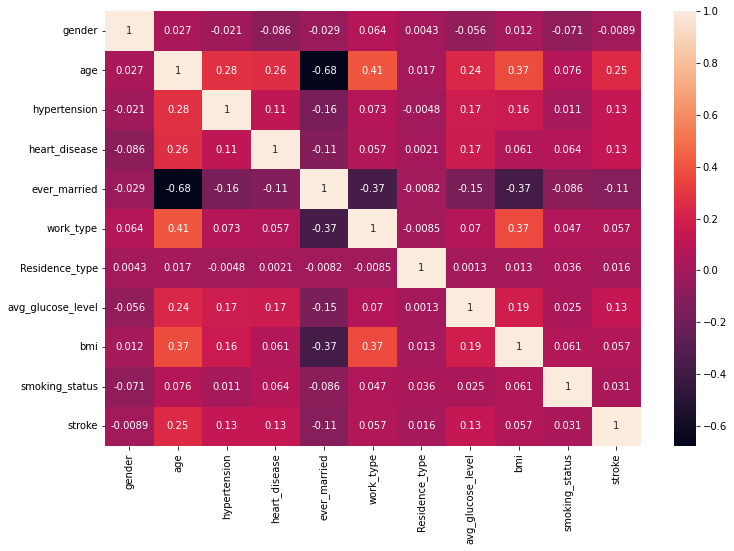

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [25]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
df1 = df.drop(["gender","ever_married"],axis=1)

In [27]:
df1.columns

Index(['age', 'hypertension', 'heart_disease', 'work_type', 'Residence_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [28]:
df1.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,3,1,228.69,36.6,2,1
1,80.0,0,1,3,0,105.92,32.5,0,1
2,49.0,0,0,3,1,171.23,34.4,3,1
3,79.0,1,0,2,0,174.12,24.0,0,1
4,81.0,0,0,3,1,186.21,29.0,2,1


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[["age","avg_glucose_level","bmi"]] = scaler.fit_transform(df1[["age","avg_glucose_level","bmi"]])

In [30]:
type(df1)

pandas.core.frame.DataFrame

In [31]:
df1.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.040584,0,1,3,1,2.723411,1.193238,2,1
1,1.614270,0,1,3,0,-0.000523,0.589390,0,1
2,0.246250,0,0,3,1,1.448529,0.869222,3,1
3,1.570141,1,0,2,0,1.512650,-0.662492,0,1
4,1.658400,0,0,3,1,1.780895,0.073909,2,1


In [32]:
X = df1.drop(["stroke"],axis=1)

In [33]:
Y = df1["stroke"]

In [34]:
X.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.040584,0,1,3,1,2.723411,1.193238,2
1,1.614270,0,1,3,0,-0.000523,0.589390,0
2,0.246250,0,0,3,1,1.448529,0.869222,3
3,1.570141,1,0,2,0,1.512650,-0.662492,0
4,1.658400,0,0,3,1,1.780895,0.073909,2


In [35]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [36]:
print("Shape of independent features: -",X.shape,"\nShape of dependent features: -",Y.shape)

Shape of independent features: - (4981, 8) 
Shape of dependent features: - (4981,)


In [37]:
df1

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.040584,0,1,3,1,2.723411,1.193238,2,1
1,1.614270,0,1,3,0,-0.000523,0.589390,0,1
2,0.246250,0,0,3,1,1.448529,0.869222,3,1
3,1.570141,1,0,2,0,1.512650,-0.662492,0,1
4,1.658400,0,0,3,1,1.780895,0.073909,2,1
...,...,...,...,...,...,...,...,...,...
4976,-0.106788,0,0,3,0,-0.794162,0.191733,2,0
4977,-0.150917,0,0,3,1,1.890500,0.383197,3,0
4978,0.069731,1,0,1,0,-0.242364,0.486294,3,0
4979,-0.150917,0,0,3,0,-0.488199,0.221189,3,0


In [38]:
print(df1.mean(axis=0))

age                  2.853012e-18
hypertension         9.616543e-02
heart_disease        5.520980e-02
work_type            2.174664e+00
Residence_type       5.083317e-01
avg_glucose_level    1.169735e-16
bmi                 -6.219567e-16
smoking_status       1.116643e+00
stroke               4.978920e-02
dtype: float64


In [39]:
print(df1.std(axis=0))

age                  1.000100
hypertension         0.294848
heart_disease        0.228412
work_type            1.101664
Residence_type       0.499981
avg_glucose_level    1.000100
bmi                  1.000100
smoking_status       1.073712
stroke               0.217531
dtype: float64


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5,random_state=None,shuffle=True)
accuracy=[]

for train_index,test_index in skf.split(X,Y):
    print("Train: ",train_index,"Test: ",test_index)
    X_train,X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train,Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=60,criterion="gini",random_state=None)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    score = accuracy_score(Y_test,Y_pred)
    accuracy.append(score)

print(accuracy)
print("Accuracy: ",np.mean(accuracy))

Train:  [   0    1    3 ... 4977 4978 4979] Test:  [   2    4    6   21   22   26   28   36   42   44   45   47   49   57
   62   68   71   78   86   87   91   94   95   99  105  122  128  130
  144  153  154  157  158  164  165  171  172  173  176  180  189  192
  208  226  229  233  234  237  243  252  259  262  264  269  272  290
  294  299  305  308  310  320  330  331  334  336  340  347  349  351
  365  366  369  376  380  382  385  388  389  391  395  412  414  416
  425  429  430  432  433  443  446  448  452  458  461  462  464  479
  481  482  483  492  496  511  531  543  547  549  555  559  562  567
  571  572  575  576  577  578  588  603  612  614  617  625  626  628
  629  630  638  643  649  650  656  677  685  686  696  699  700  704
  714  715  716  723  730  731  733  735  738  739  741  746  748  754
  769  770  781  782  785  789  794  795  799  801  802  803  807  808
  809  811  812  824  832  846  849  852  857  861  870  872  879  880
  889  890  896  900  901 

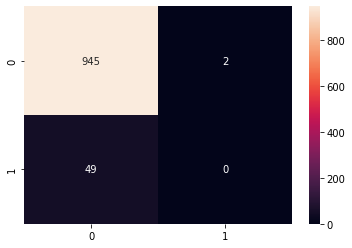

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt="d")
plt.show()

As we can see, the FP is less than FN, we have to consider recall score as evaluation metric.

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
imp = ExtraTreesClassifier(n_estimators=50,random_state=0)
imp.fit(X,Y)

ExtraTreesClassifier(n_estimators=50, random_state=0)

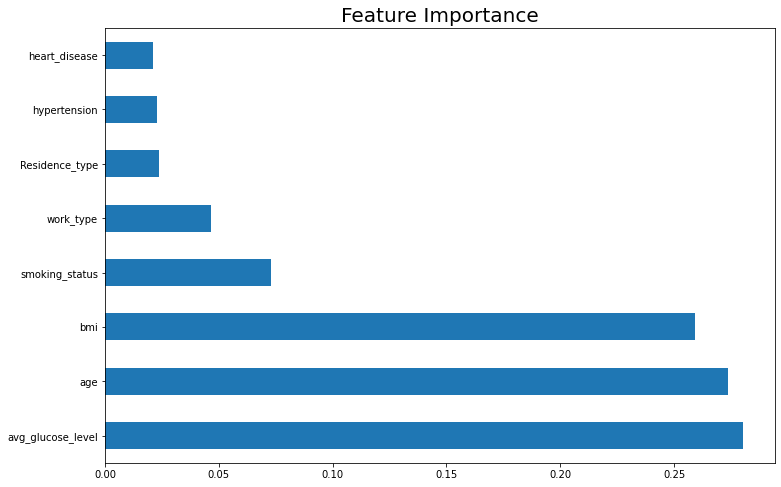

In [44]:
plt.figure(figsize=(12,8))
plt.title("Feature Importance",fontsize=20)
feat_importances = pd.Series(imp.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

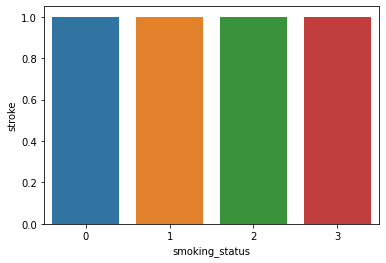

In [45]:
sns.barplot(x=df1["smoking_status"][0:10],y=df1["stroke"][0:10])

### Saving model

In [46]:
import pickle

In [47]:
pickle.dump(model,open("model.pkl","wb"))